# <p style="text-align:center;" >  <span style="font-size:42px" > <span style='background:'> **Time Series - Furniture Sales Forecast** </span> <span> <span>  </p> 


*******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Loading Dataset <span>  </div> <p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',parse_dates=['Order Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Data Preprocessing <span>  </div> <p>

<span style="font-size:28px" ><mark> Filtering the Category - Furniture<span ><mark> 

In [3]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [4]:
furn_df = df[df['Category']== 'Furniture']
furn_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
furn_df['Category'].unique()

array(['Furniture'], dtype=object)

<span style="font-size:18px" >As per the use case we only need to analyse the Category : Furniture hence I have created a separate dataframe for it.

*************************

<span style="font-size:28px" ><mark> Knowing our dataset </mark> <span> 

In [6]:
furn_df.shape

(2121, 21)

In [7]:
furn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [8]:
furn_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [9]:
from tabulate import tabulate

a = furn_df.select_dtypes(exclude='object')
b = furn_df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({'categorical':b_lst,'numerical':a_lst},headers = ['Categorical','Numerical']))

Categorical    Numerical
-------------  -----------
Order ID       Row ID
Ship Mode      Order Date
Customer ID    Ship Date
Customer Name  Postal Code
Segment        Sales
Country        Quantity
City           Discount
State          Profit
Region
Product ID
Category
Sub-Category
Product Name


*****************

<span style="font-size:28px" ><mark>  Identifying and handling the missing values </mark> <span>

In [10]:
furn_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<span style="font-size:18px" >No missing null values

*********************

<span style="font-size:28px" ><mark> Grouping Multiple Entries Of The Order Date </mark> <span>

In [11]:
furn_df = furn_df.groupby(['Order Date']).sum().reset_index()

In [12]:
furn_df.columns

Index(['Order Date', 'Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
furn_df = furn_df.drop(furn_df[['Row ID','Postal Code']],axis = 1)

In [14]:
furn_df

,Order Date,Sales,Quantity,Discount,Profit
0,2014-01-06,2573.8200,9,0.00,746.4078
1,2014-01-07,76.7280,3,0.60,-53.7096
2,2014-01-10,51.9400,1,0.00,21.2954
3,2014-01-11,9.9400,2,0.00,3.0814
4,2014-01-13,879.9390,9,0.15,91.2798
...,...,...,...,...,...
884,2017-12-24,1393.4940,14,0.50,222.9092
885,2017-12-25,832.4540,14,0.80,-7.0763
886,2017-12-28,551.2568,17,2.02,-49.6680
887,2017-12-29,2330.7180,26,0.20,492.6236


<span style="font-size:18px" > Since we have multiple entries for a single date we grouped by them and sumed up the sales to get single enrties per date.

*******************

<span style="font-size:28px" ><mark> Setting Date As Index </mark> <span>

In [15]:
furn_df["Order Date"] = pd.to_datetime(furn_df["Order Date"])
furn_df.set_index("Order Date", inplace = True)
furn_df.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

******************

<span style="font-size:28px" ><mark> Resampling the data to seee trends <span ><mark> 

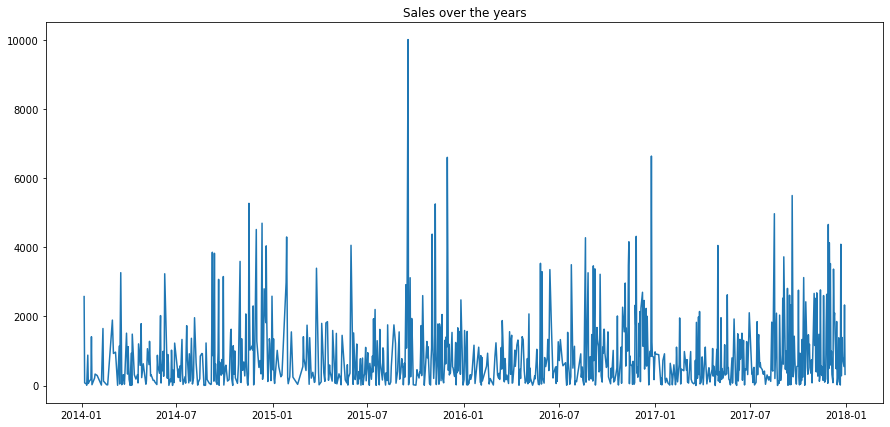

In [16]:
plt.figure(figsize = (15,7))
plt.title('Sales over the years')
plt.plot(furn_df['Sales'])
plt.show()

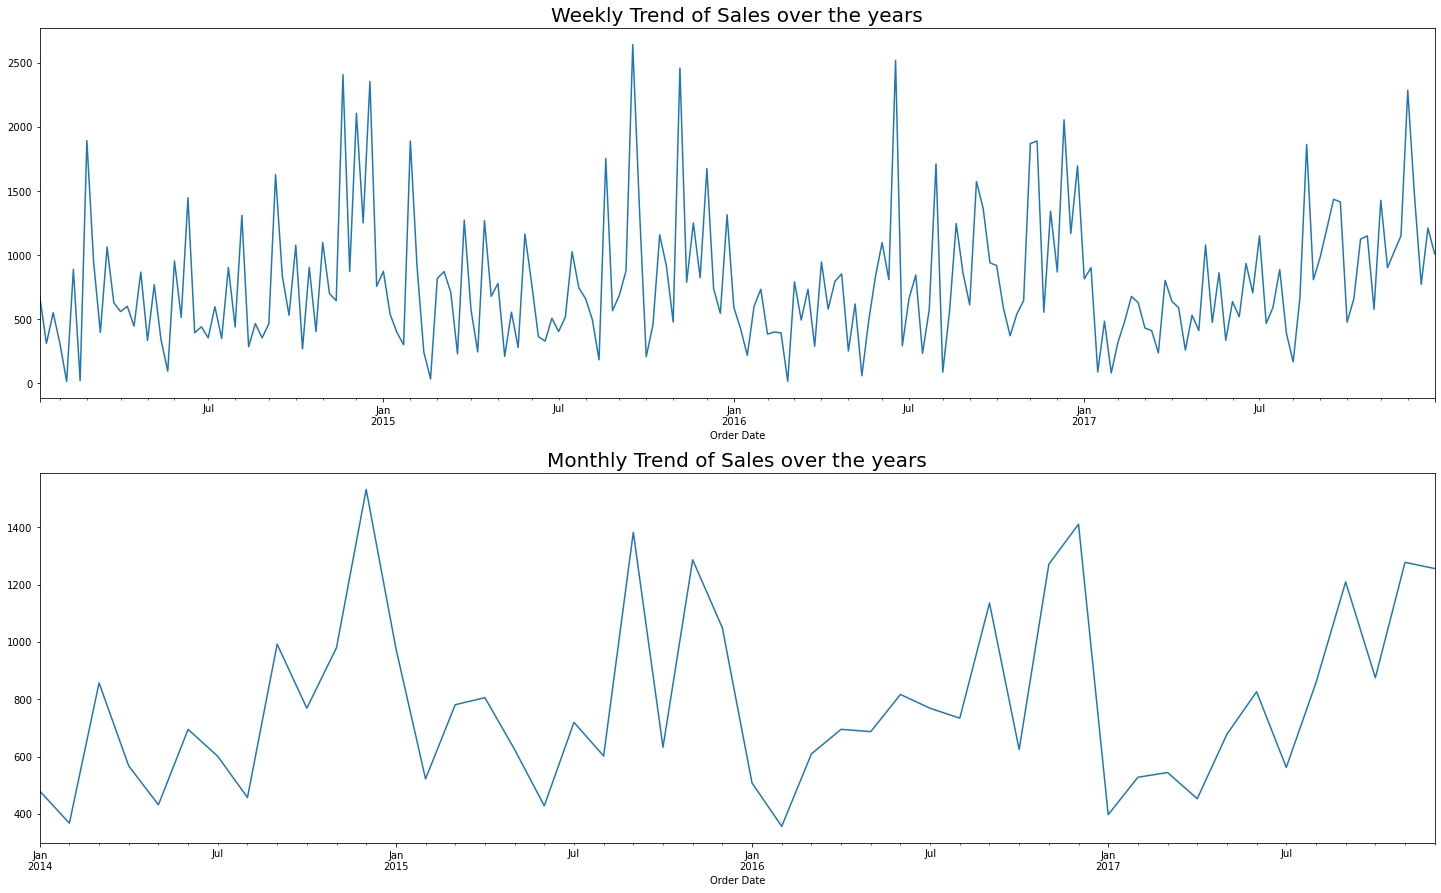

In [17]:
plt.figure(figsize=(25,15))
plt.subplot(211)
weekly_df = furn_df.resample('w').mean()
plt.title('Weekly Trend of Sales over the years',fontsize=20)
weekly_df['Sales'].plot()

plt.subplot(212)
monthly_df = furn_df.resample('M').mean()
plt.title('Monthly Trend of Sales over the years',fontsize=20)
monthly_df['Sales'].plot()

plt.show()

### Interpretation:
    - We can see both trend and seasonality in the sales of furniture.
    - We can see that December January are the best months in terms of sales and middle of the year is when the sales drop.


*************

<span style="font-size:28px" ><mark>Decomposition <span ><mark> 

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(weekly_df['Sales'], period = 12 )
d_trend = decomp.trend
d_seasonal = decomp.seasonal
d_resid = decomp.resid

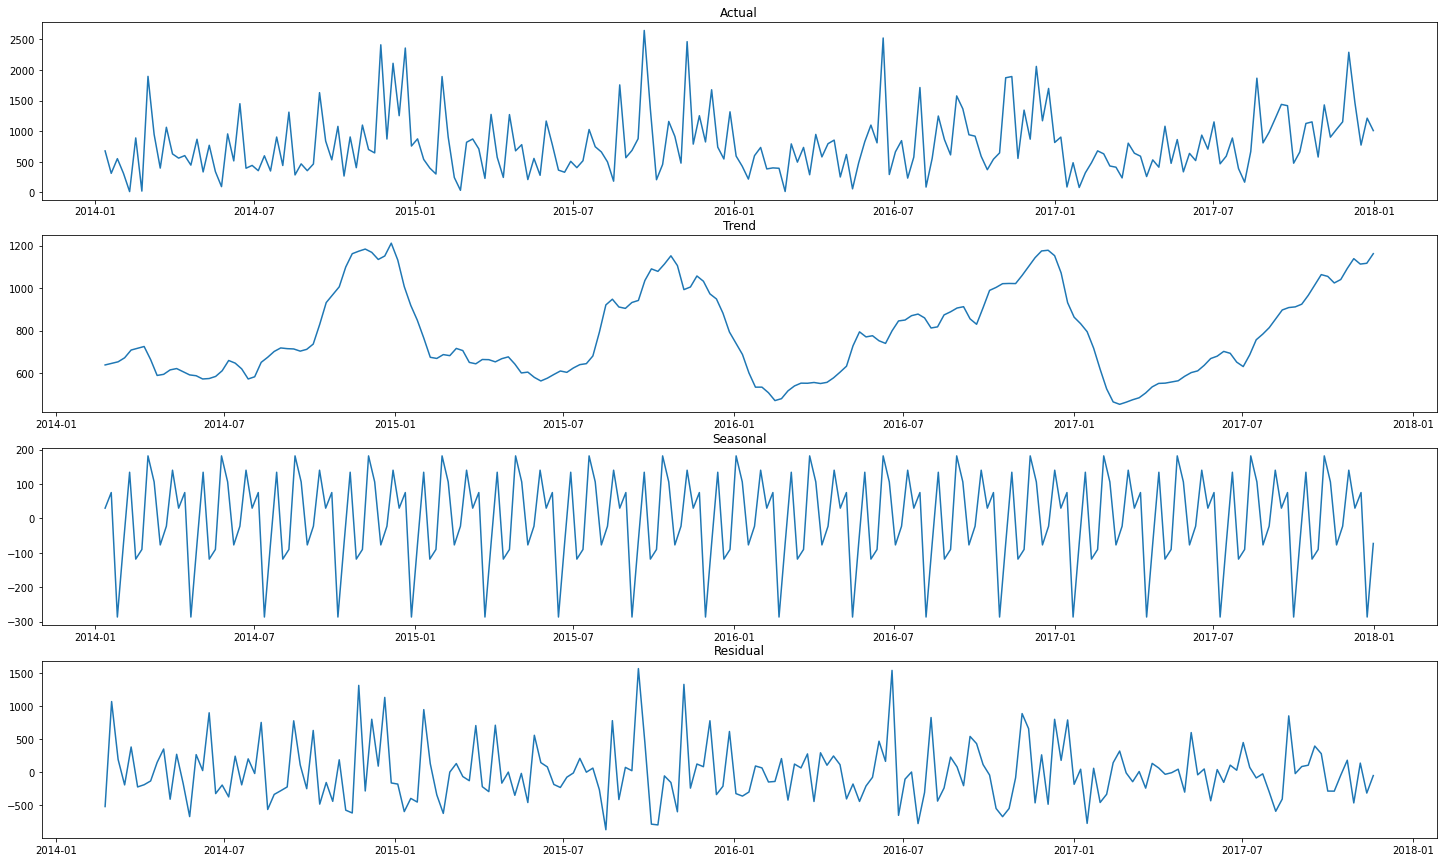

In [19]:
plt.figure(figsize=(25,15))

plt.subplot(411)
plt.title('Actual')
plt.plot(weekly_df['Sales'])
plt.subplot(412)
plt.title('Trend')
plt.plot(d_trend)
plt.subplot(413)
plt.title('Seasonal')
plt.plot(d_seasonal)
plt.subplot(414)
plt.title('Residual')
plt.plot(d_resid)
plt.show()

## Interpretation :
    - As mentioned in the resampled data we see trend and seasonality.
    - We also see the presence of irregulaties in our data.
   

*****************

 <span style="font-size:28px" ><mark>Stationarity Check<span ><mark> 

In [20]:
from statsmodels.tsa.stattools import adfuller

def checkstationarity(data):
    pvalue = adfuller(data)[1] ## pvalue of 1
    if pvalue < 0.05:
        ret = 'Data is stationary.'
    else :
        ret = 'Data is not stationary.'
    return(ret)

In [21]:
checkstationarity(weekly_df['Sales'])

'Data is stationary.'

***********

  <span style="font-size:28px" ><mark>  ACF and PACF<span ><mark>

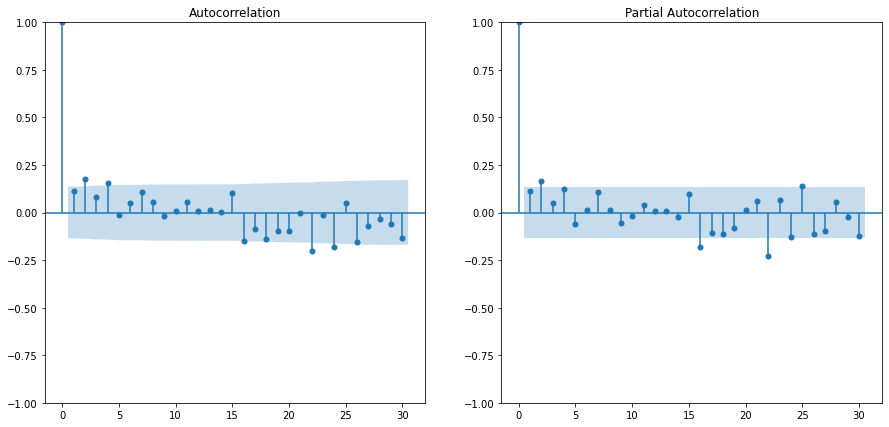

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

r=1
c=2
fig,ax=plt.subplots(r,c,figsize=(15,7))
plot_acf(weekly_df['Sales'],lags=30,ax=ax[0])
plot_pacf(weekly_df['Sales'],lags=30,ax=ax[1])
plt.show()

### Interpretation : 
        - We can see our p = 3 after looking at the spikes in Partial Autocorrelation plot
        - We can see our q = 4 after looking at the spikes in  Autocorrelation plot

*************************

  <span style="font-size:28px" ><mark> Splitting The Data<span ><mark>

In [23]:
train_len = int(len(weekly_df) * 0.75)
train = weekly_df.iloc[:train_len]
test = weekly_df.iloc[train_len:]
print(len(train))
print(len(test))

156
52


******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Model Building<span>  </div> <p>


## Since we have already established the fact that the dataset contains both trend and seasonality we will be using these models to build our model and forecast the sales values:

- SARIMA
- SARIMAX

*************************

  <span style="font-size:28px" ><mark>SARIMA<span ><mark>

### Building and fitting the model 

In [24]:
import statsmodels.api as sm

p =3 ; d=0 ; q=4

sarima_model = sm.tsa.statespace.SARIMAX(train.Sales,order=(p,d,q),seasonal_order =(2,0,0,30)).fit()
sarima_model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92611D+00    |proj g|=  1.48110D-01


 This problem is unconstrained.



At iterate    5    f=  7.71701D+00    |proj g|=  5.75015D-02

At iterate   10    f=  7.71578D+00    |proj g|=  3.23599D-03

At iterate   15    f=  7.71560D+00    |proj g|=  4.08933D-03

At iterate   20    f=  7.71407D+00    |proj g|=  7.49930D-03

At iterate   25    f=  7.71359D+00    |proj g|=  1.94934D-03

At iterate   30    f=  7.71309D+00    |proj g|=  5.91035D-03

At iterate   35    f=  7.71303D+00    |proj g|=  1.97428D-04

At iterate   40    f=  7.71301D+00    |proj g|=  1.95524D-03

At iterate   45    f=  7.71246D+00    |proj g|=  6.01787D-03

At iterate   50    f=  7.70967D+00    |proj g|=  1.20892D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Summary

In [25]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  156
Model:             SARIMAX(3, 0, 4)x(2, 0, [], 30)   Log Likelihood               -1202.709
Date:                             Fri, 18 Nov 2022   AIC                           2425.417
Time:                                     18:13:01   BIC                           2455.916
Sample:                                 01-12-2014   HQIC                          2437.804
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8690      0.859      1.012      0.312      -0.814       2.552
ar.L2          0.7061      0.932      0.758      0.448      -1.120       2.532
ar.L3         -0.5758      0.520     -1.108      0.268      -1.594       0.443
ma.L1         -0.8228      0.879     -0.936      0.349      -2.546       0.901
ma.L2         -0.5567      0.916     -0.608      0.543      -2.352       1.239
ma.L3          0.4679      0.564      0.829      0.407      -0.638       1.574
ma.L4         -0.0548      0.171     -0.320      0.749      -0.390       0.281
ar.S.L30      -0.0637      0.113     -0.564      0.573      -0.285       0.158
ar.S.L60       0.0417      0.094      0.442      0.659      -0.143       0.227
sigma2      2.858e+05   2.56e-05   1.12e+10      0.000    2.86e+05    2.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                45.59
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.14
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.89e+26. Standard errors may be unstable.
"""

### Forecasting on train data

In [26]:
sarima_fcast = sarima_model.fittedvalues
sarima_fcast

Order Date
2014-01-12       0.000000
2014-01-19     404.318123
2014-01-26     414.984052
2014-02-02     398.488590
2014-02-09     422.659938
                 ...     
2016-12-04     902.608267
2016-12-11    1027.546022
2016-12-18     956.998492
2016-12-25    1104.188418
2017-01-01    1075.220152
Freq: W-SUN, Length: 156, dtype: float64

### Prediction on test data

In [27]:
sarima_pred = sarima_model.predict(1 , len(weekly_df) )
weekly_df['sarima_pred'] = sarima_pred

### Evalutaion Metrics

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sarima_mse = mean_squared_error(train['Sales'],sarima_pred[:156])
print('MSE  :',sarima_mse)
sarima_rmse = mean_squared_error(train['Sales'],sarima_pred[:156],squared=False)
print('RMSE :',sarima_rmse)


MSE  : 268752.58168573986
RMSE : 518.4135238260475


### Information Criteria

In [29]:
sarima_aic = sarima_model.aic
print('AIC : ',sarima_aic)
sarima_bic = sarima_model.bic
print('BIC : ',sarima_bic)

AIC :  2425.4170811575723
BIC :  2455.9156412300676


### Visualization

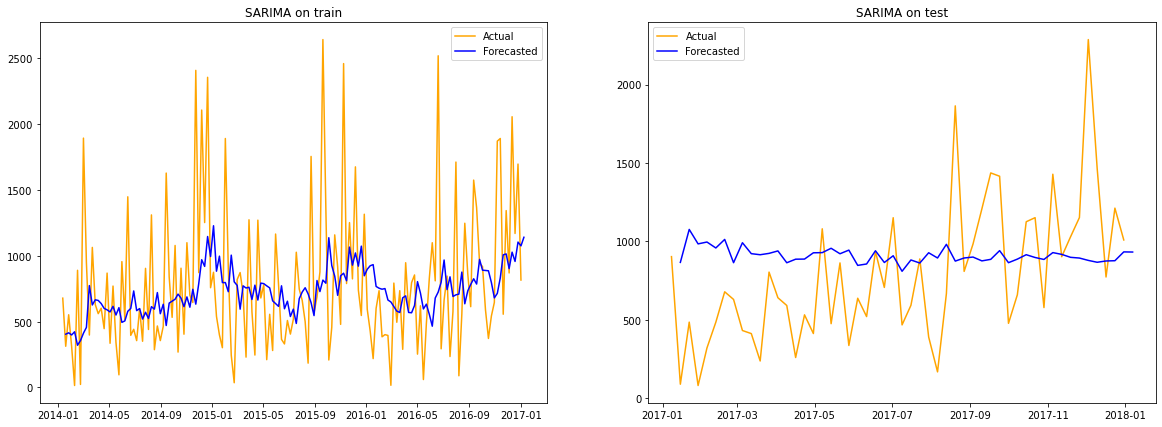

In [30]:
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('SARIMA on train')
plt.plot(train['Sales'], color = 'orange' , label = 'Actual')
plt.plot(sarima_pred[:156], color = 'b' , label = 'Forecasted')
plt.legend()

plt.subplot(122)
plt.title('SARIMA on test')
plt.plot(test['Sales'], color = 'orange' , label = 'Actual')
plt.plot(sarima_pred[156:], color = 'b' , label = 'Forecasted')
plt.legend()
plt.show()

### Interpretation : 
    - We can see that the train data is still forecasted more closely as compared to the test data.
    - This model is not the best model.

*********************

  <span style="font-size:28px" ><mark>SARIMAX<span ><mark>

In [31]:
weekly_df.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'sarima_pred'], dtype='object')

### Splitting the exogenous columns

In [32]:
rows = int(0.75*len(weekly_df))

train = weekly_df.iloc[:rows]
test = weekly_df.iloc[rows:]

exog_train = train[['Quantity','Discount','Profit']]
exog_test = test[['Quantity','Discount','Profit']]

### Building and Fitting the model

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p= 3 ; d = 0 ; q = 4

sarimax_model = SARIMAX(train.Sales , order = (p,d,q) , seasonal_order = (p,d,q,30),exog = exog_train).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19957D+00    |proj g|=  1.42877D-01


 This problem is unconstrained.



At iterate    5    f=  7.18680D+00    |proj g|=  6.00627D-02

At iterate   10    f=  7.18277D+00    |proj g|=  1.10382D-02

At iterate   15    f=  7.17831D+00    |proj g|=  1.19095D-02

At iterate   20    f=  7.17564D+00    |proj g|=  1.98658D-02

At iterate   25    f=  7.17507D+00    |proj g|=  8.30717D-03

At iterate   30    f=  7.17372D+00    |proj g|=  9.90065D-03

At iterate   35    f=  7.17328D+00    |proj g|=  1.79592D-02

At iterate   40    f=  7.17298D+00    |proj g|=  1.25909D-02

At iterate   45    f=  7.17283D+00    |proj g|=  3.66757D-03


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.17245D+00    |proj g|=  3.02876D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     55      1     0     0   3.029D-02   7.172D+00
  F =   7.1724521601208790     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


### Forecasting

In [34]:
fcast_sarimax = sarimax_model.fittedvalues
fcast_sarimax

Order Date
2014-01-12     403.336410
2014-01-19     532.090028
2014-01-26     775.731320
2014-02-02     324.812993
2014-02-09     194.543592
                 ...     
2016-12-04    1129.086807
2016-12-11    1632.418976
2016-12-18     934.420712
2016-12-25    1406.871525
2017-01-01     949.306144
Freq: W-SUN, Length: 156, dtype: float64

### Prediction on test data

In [35]:
sarimax_forecast = sarimax_model.forecast(len(test), exog=exog_test.values)
weekly_df['sarimax_forecast'] = sarimax_forecast

### Evaluation Metrics

In [36]:
sarimax_mse = mean_squared_error(train.Sales,fcast_sarimax)
sarimax_rmse = mean_squared_error(train.Sales,fcast_sarimax,squared=False)

print('MSE :',sarimax_mse)
print('RMSE :',sarimax_rmse)

MSE : 97577.86022052873
RMSE : 312.3745511729929


### Information Criteria

In [37]:
sarimax_aic = sarimax_model.aic
print('AIC : ',sarimax_aic)
sarimax_bic = sarima_model.bic
print('BIC : ',sarimax_bic)

AIC :  2273.8050739577143
BIC :  2455.9156412300676


### White noise

In [38]:
import statsmodels.api as sm

pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Bad Model')
else :
    print('Good Model')

Good Model


### Visualization

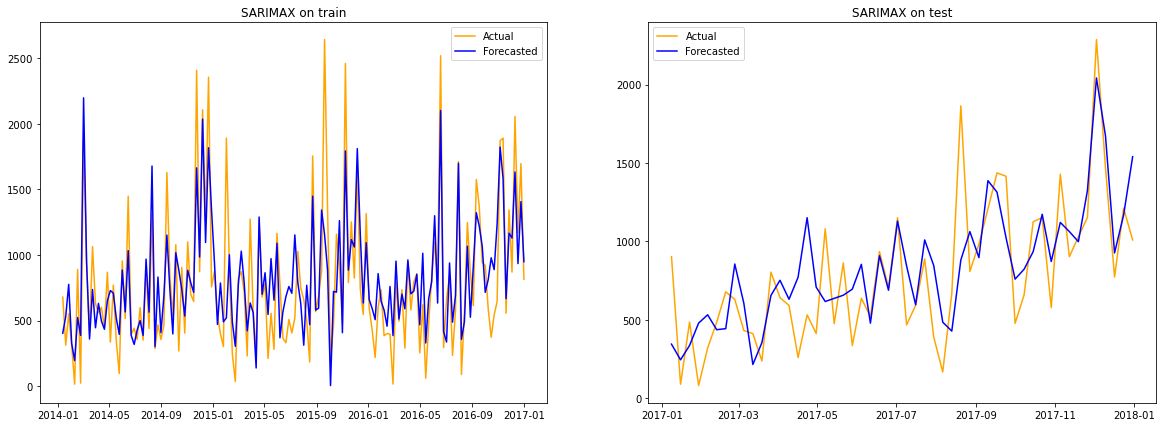

In [39]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.title('SARIMAX on train')
plt.plot(train.Sales, color = 'orange' , label = 'Actual')
plt.plot(fcast_sarimax, color = 'b' , label = 'Forecasted')
plt.legend()

plt.subplot(122)
plt.title('SARIMAX on test')
plt.plot(test.Sales, color = 'orange' , label = 'Actual')
plt.plot(sarimax_forecast, color = 'b' , label = 'Forecasted')
plt.legend()
plt.show()

### Interpretation : 
    - We can see that the train data and the test data is  forecasted more closely as compared to the Sarima model.
    - This model is a better model.

*****************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Comprison of models<span>  </div> <p>

### Information Criteria and Evaluation Metrics

In [40]:
compare = pd.DataFrame()

compare['Model']=['SARIMA','SARIMAX']

compare['AIC']=[sarima_aic,sarimax_aic]
compare['BIC']=[sarima_bic,sarimax_bic]
compare['MSE']=[sarima_mse,sarimax_mse]
compare['RMSE']=[sarima_rmse,sarimax_rmse]

compare

,Model,AIC,BIC,MSE,RMSE
0,SARIMA,2425.417081,2455.915641,268752.581686,518.413524
1,SARIMAX,2273.805074,2455.915641,97577.860221,312.374551


********************

### Visualization

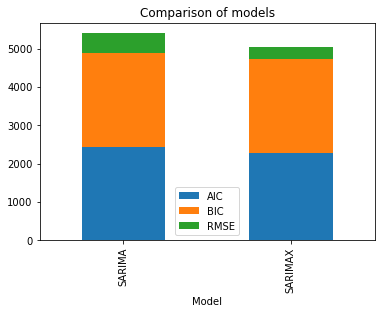

In [41]:
compare_plot = compare[['Model','AIC','BIC','RMSE']]
compare_plot.plot(x='Model', kind='bar', stacked=True, title='Comparison of models')
plt.show()

### Interpretation : We can see the criterias are low for SARIMAX which makes it a better model.

***********************

### Actual Values VS Forecasted values

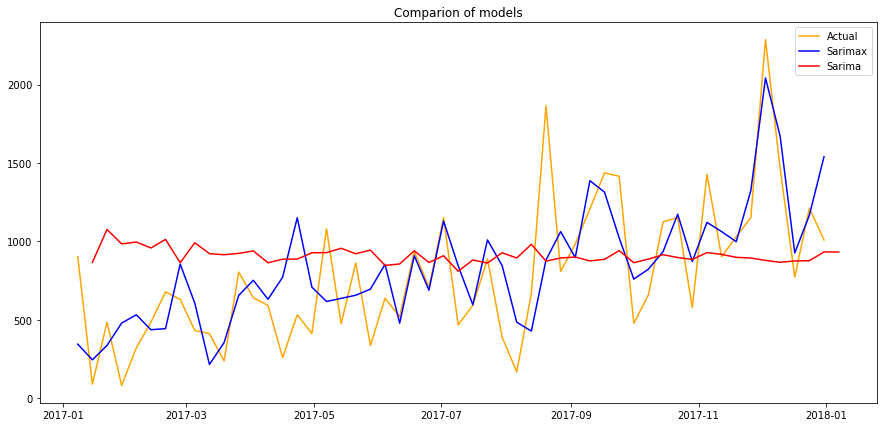

In [42]:
plt.figure(figsize=(15,7))
plt.title('Comparion of models')
plt.plot(test['Sales'], color = 'orange' , label = 'Actual')
plt.plot(sarimax_forecast, color = 'b' , label = 'Sarimax')
plt.plot(sarima_pred[156:], color = 'r' , label = 'Sarima')
plt.legend()
plt.show()

### Interpretation :
     - We can see that the SARIMAX line is closer to the Actual values as compared to the SARIMA line. 
     - We also compared the information criterias and evaluation metrics and the outcome reflects that SARIMAX is indeed the better model.

*********************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Forecasting Sales <span>  </div> <p>

In [43]:
exog = weekly_df[['Quantity','Discount','Profit']]

In [44]:
exog

,Quantity,Discount,Profit
Order Date,,,
2014-01-12,3.750000,0.150000,179.268750
2014-01-19,6.000000,0.387500,-63.501100
2014-01-26,8.666667,0.066667,118.542100
2014-02-02,2.500000,0.175000,-6.615200
2014-02-09,2.000000,0.000000,5.532800
...,...,...,...
2017-12-03,21.714286,0.871429,-25.523386
2017-12-10,19.166667,0.566667,86.619800
2017-12-17,9.500000,0.808333,-130.020717


In [45]:
forecast_model = SARIMAX(weekly_df.Sales,order=(3,0,4),seasonal_order=(3,0,4,30),exog= exog.values).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17228D+00    |proj g|=  9.31105D-02


 This problem is unconstrained.



At iterate    5    f=  7.16651D+00    |proj g|=  1.24861D-02

At iterate   10    f=  7.16522D+00    |proj g|=  6.50173D-03

At iterate   15    f=  7.16309D+00    |proj g|=  6.48745D-02

At iterate   20    f=  7.15754D+00    |proj g|=  2.93691D-02

At iterate   25    f=  7.15559D+00    |proj g|=  2.40572D-02

At iterate   30    f=  7.15462D+00    |proj g|=  2.62822D-02

At iterate   35    f=  7.15418D+00    |proj g|=  2.64094D-02

At iterate   40    f=  7.15258D+00    |proj g|=  8.23374D-02

At iterate   45    f=  7.15103D+00    |proj g|=  1.12777D-01

At iterate   50    f=  7.15032D+00    |proj g|=  5.50795D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
sarimax_forecast1 = forecast_model.forecast(104, exog=exog.values[:104])

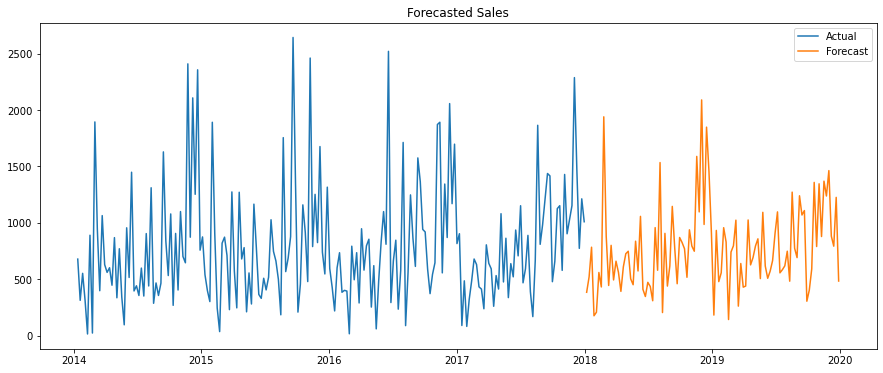

In [47]:
plt.figure(figsize=(15,6))
plt.title('Forecasted Sales')
plt.plot(weekly_df['Sales'], label = 'Actual')
plt.plot(sarimax_forecast1, label = 'Forecast')
plt.legend()
plt.show()

***************************

# Random Exog Values To Forecast Sales

In [48]:
col = exog.columns
for c in col:
    print(weekly_df[c].agg(['min', 'max']))
    

min     1.0
max    23.0
Name: Quantity, dtype: float64
min    0.0
max    1.7
Name: Discount, dtype: float64
min   -454.63080
max    434.71226
Name: Profit, dtype: float64


In [49]:
import random

qty = []

for i in range(1,209):
    x = random.uniform(0,23)
    qty.append(x)

len(qty)

208

In [50]:
disc = []

for i in range(1,209):
    x = random.uniform(0,1.7)
    disc.append(x)

disc

[0.06438095373615367,
 0.841929996602906,
 0.6237888237940367,
 0.3852541241190053,
 0.10339758675861918,
 0.8416453634665664,
 0.5098329114844772,
 0.5336923608803001,
 1.056059626695442,
 0.025112500934910954,
 0.06250488555253132,
 0.8987259428738484,
 0.8551951915035967,
 0.331769076697849,
 1.650768941823731,
 0.1790554125443139,
 1.2352506963203471,
 1.4890009771632982,
 0.7783002285643836,
 0.4734765060549451,
 0.822490809580966,
 1.1249339184409959,
 1.0781863638971314,
 1.4421431704718999,
 0.23272899044420015,
 1.021597218948717,
 0.6814983196136011,
 0.8167744817487689,
 0.49270437768544556,
 0.7048478038229165,
 1.5759464714438425,
 0.8780566299133243,
 0.36233014391519586,
 1.1145785267208794,
 1.4743495465375434,
 0.67876308519855,
 1.1591326119721526,
 0.4336712264357688,
 1.3838243135855828,
 0.8686923895406647,
 1.3678421096070756,
 0.9904443838836466,
 0.6544668207077811,
 1.0472582051000605,
 0.6003926996868586,
 1.4766284037600128,
 0.20598637403138095,
 1.428081736

In [51]:
profit = []

for i in range(1,209):
    x = random.uniform(-454.63080,434.71226)
    profit.append(x)

profit

[-94.60958595128648,
 357.09828371881247,
 -396.26078292524,
 416.20569746426713,
 -228.7831554546182,
 114.5632292166656,
 102.07822506383309,
 -431.1545133340077,
 -447.1332847695449,
 -398.5768770775858,
 -379.581148561676,
 -83.80329876457921,
 -425.78366026793594,
 233.6151142324353,
 130.6354611967563,
 312.71571989915867,
 -316.86845329423454,
 87.0076111884249,
 -106.33749684780815,
 -238.9557162985009,
 244.191647230419,
 424.72215053216985,
 -216.3329310898388,
 324.97745579874515,
 -173.21382287469203,
 -339.47092675585975,
 -327.2931040793543,
 -185.85076513206536,
 -386.5914065951121,
 141.063542996803,
 -411.0952434076171,
 333.9508213305295,
 -452.29722987954017,
 91.20128479141727,
 58.68604600733147,
 -293.7782215662717,
 404.1797647593112,
 -62.100800032916084,
 -197.80496495427076,
 -401.4157071695893,
 -242.75954525322194,
 -107.83409103046245,
 -344.59136895367703,
 188.7154733153941,
 -226.69945489522266,
 310.01168684980166,
 227.6334606485765,
 159.0707298459222

In [52]:
random_exog = pd.DataFrame()
random_exog['Quantity'] = qty
random_exog['Discount']= disc
random_exog['Profit'] = profit

In [53]:
random_exog

,Quantity,Discount,Profit
0,4.691968,0.064381,-94.609586
1,6.567704,0.841930,357.098284
2,17.417934,0.623789,-396.260783
3,4.350730,0.385254,416.205697
4,20.459472,0.103398,-228.783155
...,...,...,...
203,19.396648,0.555451,306.490086
204,2.832386,1.445563,-306.808100
205,2.319947,1.022669,367.734645
206,21.415484,1.206112,-171.584254


In [54]:
forecast_model = SARIMAX(weekly_df.Sales,order=(3,0,4),seasonal_order=(3,0,4,30),exog= random_exog.values).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.69104D+00    |proj g|=  6.63710D-02


 This problem is unconstrained.



At iterate    5    f=  7.68260D+00    |proj g|=  6.48496D-03

At iterate   10    f=  7.68126D+00    |proj g|=  2.92870D-02

At iterate   15    f=  7.67800D+00    |proj g|=  1.65825D-02

At iterate   20    f=  7.67675D+00    |proj g|=  7.68501D-03

At iterate   25    f=  7.67610D+00    |proj g|=  1.63405D-02

At iterate   30    f=  7.67555D+00    |proj g|=  2.39004D-02

At iterate   35    f=  7.67349D+00    |proj g|=  5.48338D-02

At iterate   40    f=  7.67279D+00    |proj g|=  1.90454D-02

At iterate   45    f=  7.67250D+00    |proj g|=  2.29873D-02


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.67237D+00    |proj g|=  1.20420D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     56      1     0     0   1.204D-02   7.672D+00
  F =   7.6723716868464855     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [55]:
sarimax_forecast_ran = forecast_model.forecast(104, exog=random_exog.values[:104])

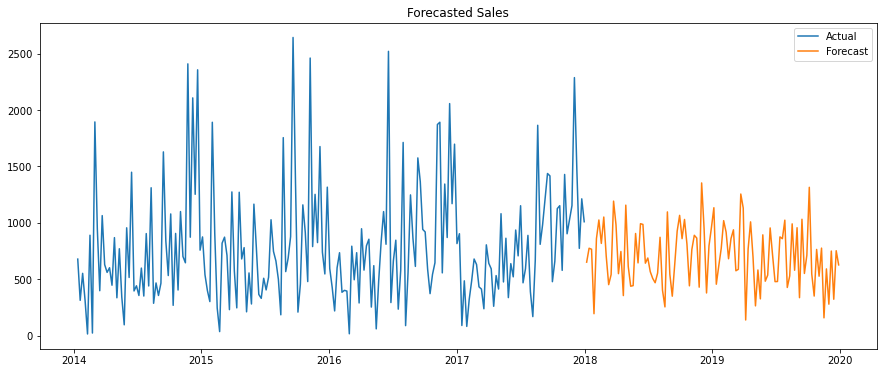

In [56]:
plt.figure(figsize=(15,6))
plt.title('Forecasted Sales')
plt.plot(weekly_df['Sales'], label = 'Actual')
plt.plot(sarimax_forecast_ran, label = 'Forecast')
plt.legend()
plt.show()

### Interpetation :
    -  Sales for 104 weeks i.e. 2 years is forecasted and plotted on this graph.

************

## Decomposing the forecasted sales.

In [60]:
fdecomp = seasonal_decompose(sarimax_forecast_ran)
fd_trend = fdecomp.trend
fd_seasonal = fdecomp.seasonal
fd_resid = fdecomp.resid

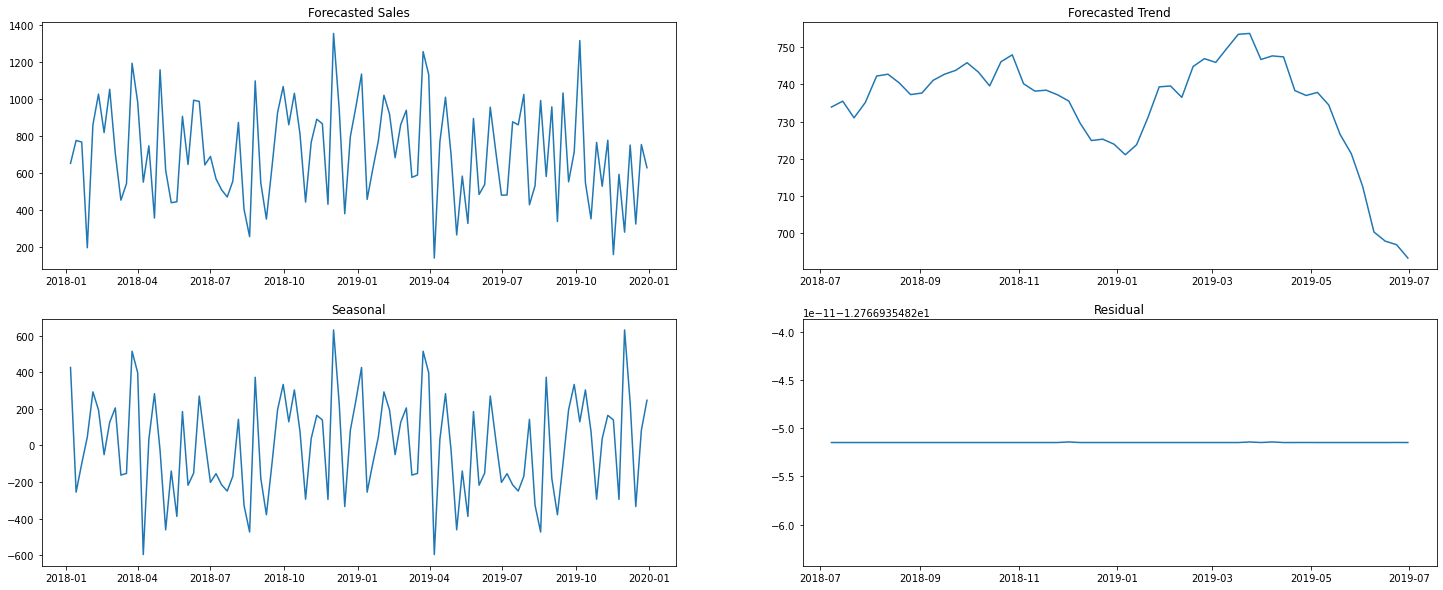

In [61]:
plt.figure(figsize=(25,10))
plt.subplot(221)
plt.title('Forecasted Sales')
plt.plot(sarimax_forecast_ran)

plt.subplot(222)
plt.title('Forecasted Trend')
plt.plot(fd_trend)

plt.subplot(223)
plt.title('Seasonal')
plt.plot(fd_seasonal)

plt.subplot(224)
plt.title('Residual')
plt.plot(fd_resid)
plt.show()

### Interpretation :

    - We can see that the trend is downward which is different from the actual dataset but seasonality in the forecasted values are very similar to the actual sales.
    - The end of each year shows an upward trend which means the store might need more stock and personnel to manage the increase in sales during that time.
    - Introducing end of season sales or some monthly promotional discounts to increase the sales during the dead months.

*****************